In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# from statannotations.Annotator import Annotator

import json

In [2]:
cartography_majority = pd.read_csv('./results/cartography_majority.csv')
cartography_majority.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_level,agreement_factor,comment_id,confidence,variability,correctness,is_correct,agreement_factor_rd
0,0,MR OBAMA IF YOUR COMPLAINING ABOUT THE WAY TH...,0.776900,0.195709,0.997088,0.223100,0.195709,0.002912,0,0,A+,0.8,1000_test,0.776900,0.195709,0.997088,True,0.8
1,1,The High Priest of COVID-19 Speaks.... Bill G...,0.396611,0.357260,0.045499,0.603389,0.357260,0.954501,1,1,A+0,0.6,1000_train,0.603389,0.357260,0.954501,True,0.6
2,2,Do you know what sarcasm means?,0.935119,0.067998,0.998300,0.064881,0.067998,0.001700,0,0,A++,1.0,1001_test,0.935119,0.067998,0.998300,True,1.0
3,3,"Politicians, not scientists. Like we are goin...",0.764697,0.204913,0.991857,0.235303,0.204913,0.008143,0,0,A++,1.0,1001_train,0.764697,0.204913,0.991857,True,1.0
4,4,Four more years of tRump &amp; our country ...,0.863673,0.200856,0.997282,0.136327,0.200856,0.002718,0,0,A0,0.6,1002_dev,0.863673,0.200856,0.997282,True,0.6


In [3]:
train_values_df = pd.read_csv('./results/cartography_disco.csv')
train_values_df.head()

,text_id,annotator_id,label_0,label_1,pred_label_0,pred_label_1,epoch_no
0,3329.0,98.0,0.0,1.0,0.507486,0.492514,1.0
1,4091.0,58.0,1.0,0.0,0.535002,0.464998,1.0
2,7248.0,2.0,1.0,0.0,0.518050,0.481950,1.0
3,2234.0,211.0,1.0,0.0,0.416616,0.583384,1.0
4,8366.0,773.0,1.0,0.0,0.484292,0.515708,1.0


In [4]:
len(train_values_df['text_id'].unique())

8357

In [5]:
with open('../../data/agree_to_disagree/agree_to_disagree_train.json', 'r') as file:
    data = json.load(file)

In [6]:
data['columns']

['comment_id',
 'Text',
 'Agreement_level',
 'Individual_Annotations',
 'Offensive_binary_label',
 'Annotators_ID',
 'Domain',
 'annotation',
 'annotator_id',
 'Clean_Text',
 'label',
 'label_vector',
 'message',
 'Aindex',
 'Mindex']

In [7]:
full_df = pd.DataFrame(data['data'])
full_df.columns = data['columns']

In [8]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41785 entries, 0 to 41784
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   comment_id              41785 non-null  object
 1   Text                    41785 non-null  object
 2   Agreement_level         41785 non-null  object
 3   Individual_Annotations  41785 non-null  int64 
 4   Offensive_binary_label  41785 non-null  object
 5   Annotators_ID           41785 non-null  object
 6   Domain                  41785 non-null  object
 7   annotation              41785 non-null  int64 
 8   annotator_id            41785 non-null  object
 9   Clean_Text              41785 non-null  object
 10  label                   41785 non-null  int64 
 11  label_vector            41785 non-null  int64 
 12  message                 41785 non-null  object
 13  Aindex                  41785 non-null  int64 
 14  Mindex                  41785 non-null  int64 
dtypes:

Retaining only 5 epochs

In [9]:
train_values_df = train_values_df[train_values_df['epoch_no'] < 6]

In [10]:
train_values_df['text_id'] = train_values_df['text_id'].astype(int)
train_values_df['annotator_id'] = train_values_df['annotator_id'].astype(int)

In [11]:
train_values_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208925 entries, 0 to 208924
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   text_id       208925 non-null  int64  
 1   annotator_id  208925 non-null  int64  
 2   label_0       208925 non-null  float64
 3   label_1       208925 non-null  float64
 4   pred_label_0  208925 non-null  float64
 5   pred_label_1  208925 non-null  float64
 6   epoch_no      208925 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 12.8 MB


In [12]:
merged_df = pd.merge(train_values_df, full_df[['comment_id', 'Text', 'Agreement_level', 'Individual_Annotations', 'Offensive_binary_label', 'Annotators_ID', 'Domain', 'annotation', 'annotator_id', 'Clean_Text', 'label', 'label_vector', 'message', 'Aindex', 'Mindex']], how='left', left_on=['annotator_id', 'text_id'], right_on=['Aindex', 'Mindex'])
merged_df.head()

,text_id,annotator_id_x,label_0,label_1,pred_label_0,pred_label_1,epoch_no,comment_id,Text,Agreement_level,...,Annotators_ID,Domain,annotation,annotator_id_y,Clean_Text,label,label_vector,message,Aindex,Mindex
0,3329,98,0.0,1.0,0.507486,0.492514,1.0,3330_train,<user> <user> <user> Wouldn't they have to hav...,A+,...,"Ann490,Ann425,Ann104,Ann149,Ann379",Elections2020,1,Ann379,Wouldn't they have to have a record to run ...,1,1,Wouldn't they have to have a record to run ...,98,3329
1,4091,58,1.0,0.0,0.535002,0.464998,1.0,4092_train,#China is using its economic might to push sta...,A0,...,"Ann64,Ann188,Ann266,Ann581,Ann34",Covid-19,0,Ann188,#China is using its economic might to push sta...,0,0,#China is using its economic might to push sta...,58,4091
2,7248,2,1.0,0.0,0.518050,0.481950,1.0,720_dev,<url> okay anyways <url>,A++,...,"Ann13,Ann493,Ann149,Ann25,Ann171",BLM,0,Ann149,<url> okay anyways <url>,0,0,<url> okay anyways <url>,2,7248
3,2234,211,1.0,0.0,0.416616,0.583384,1.0,2235_train,<user> <user> <user> Totally made up slander ...,A++,...,"Ann623,Ann216,Ann368,Ann125,Ann736",BLM,0,Ann623,Totally made up slander <url>,0,0,Totally made up slander <url>,211,2234
4,8366,773,1.0,0.0,0.484292,0.515708,1.0,850_test,This just in. White plantation owner threatens...,A+0,...,"Ann229,Ann236,Ann432,Ann110,Ann408",BLM,0,Ann432,This just in. White plantation owner threatens...,0,0,This just in. White plantation owner threatens...,773,8366


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208925 entries, 0 to 208924
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   text_id                 208925 non-null  int64  
 1   annotator_id_x          208925 non-null  int64  
 2   label_0                 208925 non-null  float64
 3   label_1                 208925 non-null  float64
 4   pred_label_0            208925 non-null  float64
 5   pred_label_1            208925 non-null  float64
 6   epoch_no                208925 non-null  float64
 7   comment_id              208925 non-null  object 
 8   Text                    208925 non-null  object 
 9   Agreement_level         208925 non-null  object 
 10  Individual_Annotations  208925 non-null  int64  
 11  Offensive_binary_label  208925 non-null  object 
 12  Annotators_ID           208925 non-null  object 
 13  Domain                  208925 non-null  object 
 14  annotation          

In [14]:
def get_pred(label_0, label_1):
    if label_0 > label_1:
        return 0
    else:
        return 1

In [15]:
merged_df['pred'] = merged_df.apply(lambda row: get_pred(row.pred_label_0, row.pred_label_1), axis=1)
merged_df.head()

,text_id,annotator_id_x,label_0,label_1,pred_label_0,pred_label_1,epoch_no,comment_id,Text,Agreement_level,...,Domain,annotation,annotator_id_y,Clean_Text,label,label_vector,message,Aindex,Mindex,pred
0,3329,98,0.0,1.0,0.507486,0.492514,1.0,3330_train,<user> <user> <user> Wouldn't they have to hav...,A+,...,Elections2020,1,Ann379,Wouldn't they have to have a record to run ...,1,1,Wouldn't they have to have a record to run ...,98,3329,0
1,4091,58,1.0,0.0,0.535002,0.464998,1.0,4092_train,#China is using its economic might to push sta...,A0,...,Covid-19,0,Ann188,#China is using its economic might to push sta...,0,0,#China is using its economic might to push sta...,58,4091,0
2,7248,2,1.0,0.0,0.518050,0.481950,1.0,720_dev,<url> okay anyways <url>,A++,...,BLM,0,Ann149,<url> okay anyways <url>,0,0,<url> okay anyways <url>,2,7248,0
3,2234,211,1.0,0.0,0.416616,0.583384,1.0,2235_train,<user> <user> <user> Totally made up slander ...,A++,...,BLM,0,Ann623,Totally made up slander <url>,0,0,Totally made up slander <url>,211,2234,1
4,8366,773,1.0,0.0,0.484292,0.515708,1.0,850_test,This just in. White plantation owner threatens...,A+0,...,BLM,0,Ann432,This just in. White plantation owner threatens...,0,0,This just in. White plantation owner threatens...,773,8366,1


In [16]:
def get_confidence(label, label_0_mean, label_1_mean):
    if label == 0:
        return label_0_mean
    else:
        return label_1_mean

def get_variability(label, label_0_std, label_1_std):
    if label == 0:
        return label_0_std
    else: return label_1_std

def get_correctness(label, label_0_last, label_1_last):
    if label == 0:
        return label_0_last
    else:
        return label_1_last

def convert_agreement_factor_to_num(value):
    if value == 'A++':
        return 1
    elif value == 'A+':
        return 0.8
    else:
        return 0.6

def round_agree_factor(agr_factor):
    if agr_factor <= 0.6:
        return 0.6
    elif agr_factor <= 0.8:
        return 0.8
    return 1.0

In [17]:
metrics = ['mean', 'std', 'last']
def build_cartography_df(train_values_df):
    agg_df = train_values_df.sort_values(['epoch_no']).groupby(['Aindex', 'Mindex'], as_index=False).agg({'Text': 'first', 'pred_label_0': metrics, 'pred_label_1': metrics, 'label': 'first', 'pred': 'last', 'Agreement_level': 'first', 'annotator_id_y': 'first', 'comment_id': 'first', 'Individual_Annotations': 'first'})
    agg_df.columns = ['Aindex', 'Mindex', 'text', 'label_0_mean', 'label_0_std', 'label_0_last', 'label_1_mean', 'label_1_std', 'label_1_last', 'label', 'pred', 'agreement_level', 'annotator_id', 'comment_id', 'majority_label']

    agg_df['confidence'] = agg_df.apply(lambda row: get_confidence(row.label, row.label_0_mean, row.label_1_mean), axis=1)
    agg_df['variability'] = agg_df.apply(lambda row: get_variability(row.label, row.label_0_std, row.label_1_std), axis=1)
    agg_df['correctness'] = agg_df.apply(lambda row: get_correctness(row.label, row.label_0_last, row.label_1_last), axis=1)
    agg_df['is_correct'] = np.where((agg_df['label'] == agg_df['pred']), True, False)
    agg_df['agreement_factor'] = agg_df['agreement_level'].map(convert_agreement_factor_to_num)
    agg_df['agreement_factor_rd'] = agg_df['agreement_factor'].map(round_agree_factor)

    return agg_df

In [18]:
cartography_df = build_cartography_df(merged_df)
cartography_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,...,agreement_level,annotator_id,comment_id,majority_label,confidence,variability,correctness,is_correct,agreement_factor,agreement_factor_rd
0,0,519,"<user> <user> Sorry, which old man?",0.909335,0.087134,0.977597,0.090665,0.087134,0.022403,0,...,A++,Ann418,520_train,0,0.909335,0.087134,0.977597,True,1.0,1.0
1,0,669,<user> <user> CNN &amp; MSNBC &amp; the Democr...,0.197979,0.250169,0.026904,0.802021,0.250169,0.973096,1,...,A++,Ann418,670_train,1,0.802021,0.250169,0.973096,True,1.0,1.0
2,0,679,<user> <user> <user> President Trump spent his...,0.296290,0.195163,0.276914,0.703710,0.195163,0.723086,1,...,A+0,Ann418,680_train,1,0.703710,0.195163,0.723086,True,0.6,0.6
3,0,779,<user> Fuck off you have enough money,0.146111,0.130054,0.160468,0.853889,0.130054,0.839532,1,...,A++,Ann418,780_train,1,0.853889,0.130054,0.839532,True,1.0,1.0
4,0,956,<user> <user> Lol. Y’all’s are probably one of...,0.118437,0.148331,0.075402,0.881563,0.148331,0.924598,1,...,A+0,Ann418,957_train,1,0.881563,0.148331,0.924598,True,0.6,0.6


In [19]:
cartography_df['disagrees_with_majority'] = cartography_df.apply(lambda row: row.label != row.majority_label, axis=1)
cartography_df.tail()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,...,annotator_id,comment_id,majority_label,confidence,variability,correctness,is_correct,agreement_factor,agreement_factor_rd,disagrees_with_majority
41780,818,8735,Absolutely the TRUTH! Joe Biden has been a com...,0.393854,0.187798,0.238777,0.606146,0.187797,0.761223,1,...,Ann330,1261_test,1,0.606146,0.187797,0.761223,True,0.6,0.6,False
41781,818,9274,This was towards the middle of the conversatio...,0.546065,0.112253,0.615226,0.453935,0.112253,0.384774,0,...,Ann330,1842_test,0,0.546065,0.112253,0.615226,True,0.8,0.8,False
41782,818,9334,If Ajith fans lived in United States they woul...,0.689099,0.082329,0.700476,0.310901,0.082329,0.299524,0,...,Ann330,1902_test,0,0.689099,0.082329,0.700476,True,0.8,0.8,False
41783,818,9607,Headlines like this piss me the fuck off. This...,0.473723,0.099779,0.394389,0.526277,0.099779,0.605611,1,...,Ann330,2176_test,0,0.526277,0.099779,0.605611,True,0.6,0.6,True
41784,818,9920,It's shortly after midnight and the 24hr socia...,0.719911,0.277906,0.899761,0.280089,0.277905,0.100239,0,...,Ann330,2508_test,0,0.719911,0.277906,0.899761,True,1.0,1.0,False


In [20]:
 cartography_df['Aindex'].value_counts()


7      1581
2       874
36      792
69      770
64      700
       ... 
625       1
669       1
639       1
655       1
645       1
Name: Aindex, Length: 819, dtype: int64

In [21]:
cartography_df_ann = cartography_df[cartography_df['Aindex']==64].copy()
cartography_df_ann.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,...,annotator_id,comment_id,majority_label,confidence,variability,correctness,is_correct,agreement_factor,agreement_factor_rd,disagrees_with_majority
13839,64,97,<user> <user> Dude. Not masks alone we need to...,0.175053,0.104986,0.260174,0.824947,0.104986,0.739826,1,...,Ann448,98_train,1,0.824947,0.104986,0.739826,True,0.8,0.8,False
13840,64,179,🚨Urgent Request to SHARE~RT Needs EYES DIRECT...,0.933656,0.034451,0.932793,0.066344,0.034451,0.067207,1,...,Ann448,180_train,0,0.066344,0.034451,0.067207,False,0.6,0.6,True
13841,64,336,"Also another protest in Tokyo, this one bigger...",0.886473,0.055760,0.958262,0.113527,0.055760,0.041738,0,...,Ann448,337_train,0,0.886473,0.055760,0.958262,True,1.0,1.0,False
13842,64,354,<user> This was my reaction as well. My email ...,0.832644,0.067901,0.766505,0.167356,0.067901,0.233495,0,...,Ann448,355_train,0,0.832644,0.067901,0.766505,True,0.8,0.8,False
13843,64,357,I’ve watched this from like 5 different angles...,0.986503,0.013289,0.970956,0.013497,0.013289,0.029044,0,...,Ann448,358_train,0,0.986503,0.013289,0.970956,True,1.0,1.0,False


In [22]:
len(cartography_df_ann['Mindex'].unique())

700

In [23]:
comment_ids = cartography_df_ann['comment_id'].values.tolist()
cartography_majority_ann = cartography_majority[cartography_majority.comment_id.isin(comment_ids)]
len(comment_ids)

700

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

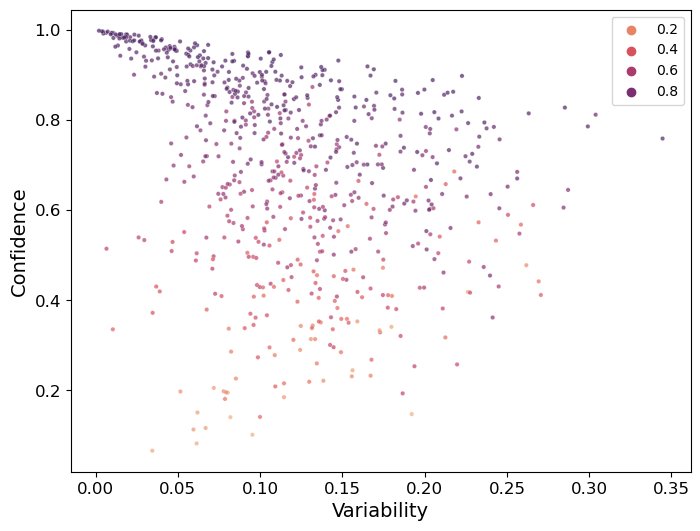

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df_ann, x="variability", y="confidence", hue='correctness', palette='flare', alpha=0.7, s=10)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig("./plots/conf_vs_var_color_agreement_factor.png", dpi=600, bbox_inches='tight')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

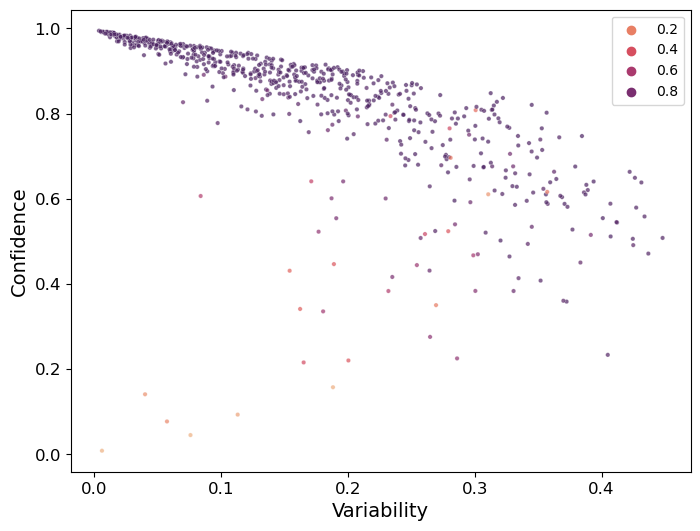

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_majority_ann, x="variability", y="confidence", hue='correctness', palette='flare', alpha=0.7, s=10)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

1. Low confidence in majority -> see their results in multi-annotator
2. High confidence in majority -> see their results in multi-annotator
3. majority label different from multi-annotator label - boxplots
4. Annotators with low f1s

### Task 1

In [26]:
low_confidence_comment_ids = cartography_majority[cartography_majority['confidence'] <= 0.5]['comment_id'].values
len(low_confidence_comment_ids)

503

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6')])

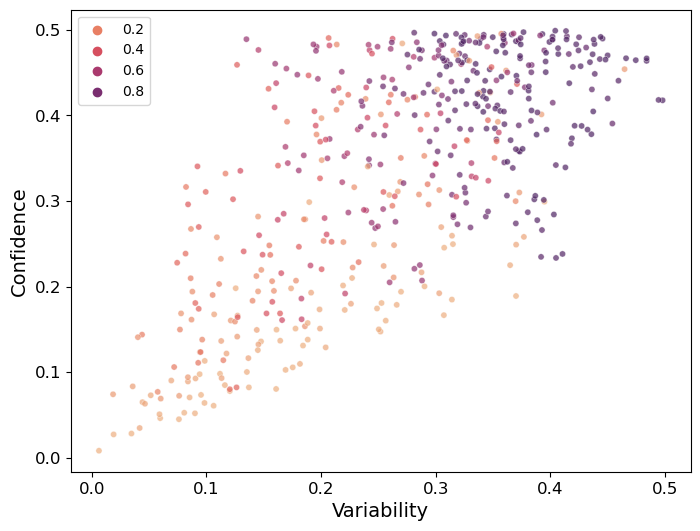

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_majority[cartography_majority['comment_id'].isin(low_confidence_comment_ids)], x="variability", y="confidence", hue='correctness', palette='flare', alpha=0.7, s=20)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [28]:
cartography_df_low_conf_in_majority = cartography_df[cartography_df['comment_id'].isin(low_confidence_comment_ids)]
cartography_df_low_conf_in_majority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 52 to 41763
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   2515 non-null   int64  
 1   Mindex                   2515 non-null   int64  
 2   text                     2515 non-null   object 
 3   label_0_mean             2515 non-null   float64
 4   label_0_std              2515 non-null   float64
 5   label_0_last             2515 non-null   float64
 6   label_1_mean             2515 non-null   float64
 7   label_1_std              2515 non-null   float64
 8   label_1_last             2515 non-null   float64
 9   label                    2515 non-null   int64  
 10  pred                     2515 non-null   int64  
 11  agreement_level          2515 non-null   object 
 12  annotator_id             2515 non-null   object 
 13  comment_id               2515 non-null   object 
 14  majority_label        

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

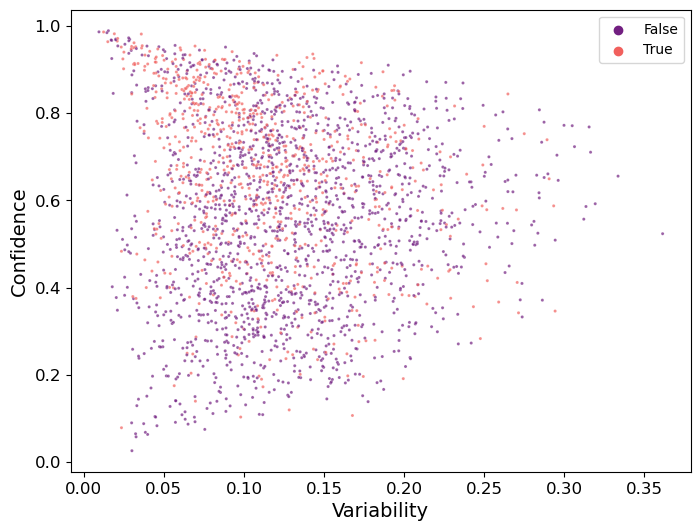

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df_low_conf_in_majority, x="variability", y="confidence", hue='disagrees_with_majority', palette='magma', alpha=0.7, s=5)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

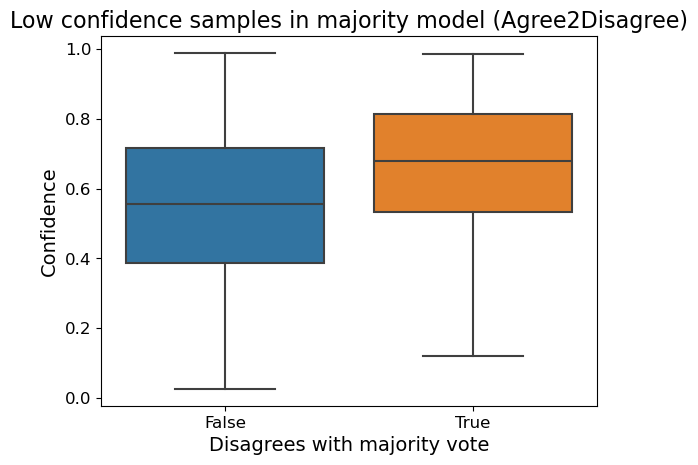

In [30]:
ax = sns.boxplot(data=cartography_df_low_conf_in_majority, x="disagrees_with_majority", y="confidence", showfliers=False)

plt.title("Low confidence samples in majority model (Agree2Disagree)", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Disagrees with majority vote', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/disco/disagree_vs_conf_low_confidence.png", dpi=600, bbox_inches='tight')

so basically, text samples with low confidence in majority model shows a tred in disco that where the label by annotator disagrees with majority, there's a general trend of higher confidence compared to the labels where the annotator agrees with majority.
Need to look at samples to see if these could be mislabelled samples where the minority annotation is the correct one.

<Axes: xlabel='disagrees_with_majority', ylabel='Count'>

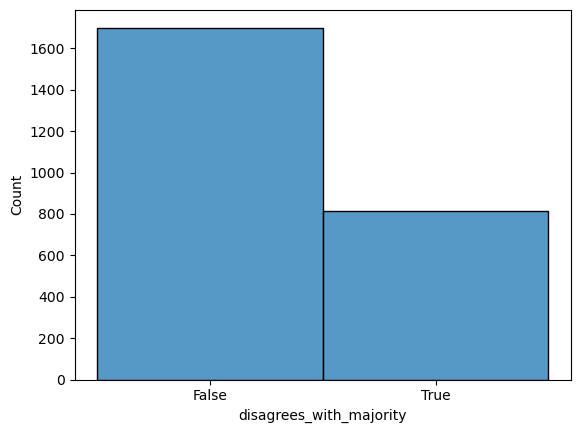

In [31]:
sns.histplot(cartography_df_low_conf_in_majority, x=cartography_df_low_conf_in_majority['disagrees_with_majority'].astype(str))

### Task 2

In [32]:
high_confidence_comment_ids = cartography_majority[cartography_majority['confidence'] > 0.5]['comment_id'].values
cartography_df_high_conf_in_majority = cartography_df[cartography_df['comment_id'].isin(high_confidence_comment_ids)]
cartography_df_high_conf_in_majority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39270 entries, 0 to 41784
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   39270 non-null  int64  
 1   Mindex                   39270 non-null  int64  
 2   text                     39270 non-null  object 
 3   label_0_mean             39270 non-null  float64
 4   label_0_std              39270 non-null  float64
 5   label_0_last             39270 non-null  float64
 6   label_1_mean             39270 non-null  float64
 7   label_1_std              39270 non-null  float64
 8   label_1_last             39270 non-null  float64
 9   label                    39270 non-null  int64  
 10  pred                     39270 non-null  int64  
 11  agreement_level          39270 non-null  object 
 12  annotator_id             39270 non-null  object 
 13  comment_id               39270 non-null  object 
 14  majority_label        

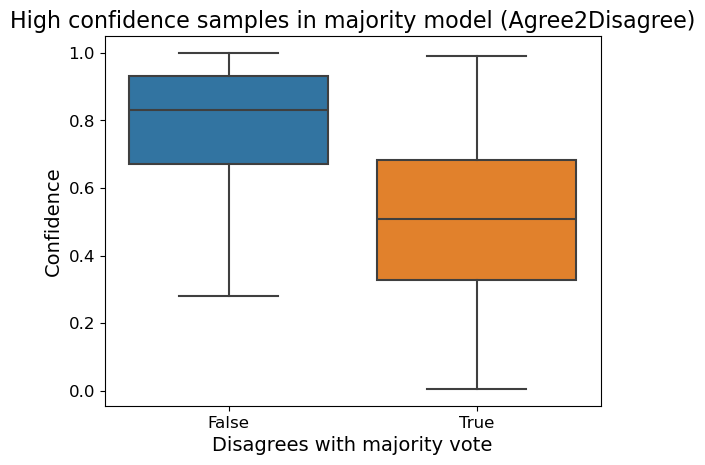

In [34]:
ax = sns.boxplot(data=cartography_df_high_conf_in_majority, x="disagrees_with_majority", y="confidence", showfliers=False)

plt.title("High confidence samples in majority model (Agree2Disagree)", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Disagrees with majority vote', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/disco/disagree_vs_conf_high_confidence.png", dpi=600, bbox_inches='tight')

### Task 3

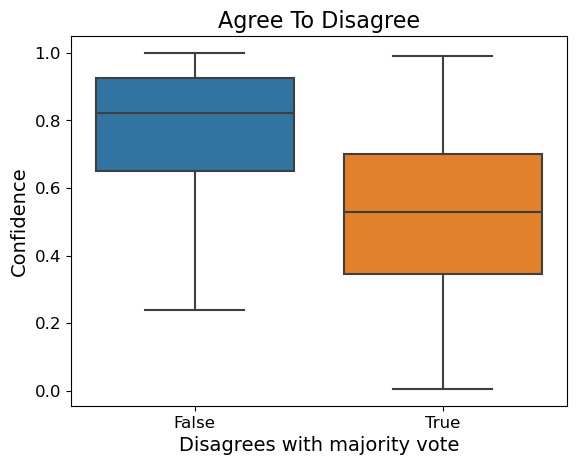

In [35]:
ax = sns.boxplot(data=cartography_df, x="disagrees_with_majority", y="confidence", showfliers=False)

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Disagrees with majority vote', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/disco/disagree_vs_conf.png", dpi=600, bbox_inches='tight')

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 [Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000'),
  Text(0, 30000.0, '30000'),
  Text(0, 35000.0, '35000')])

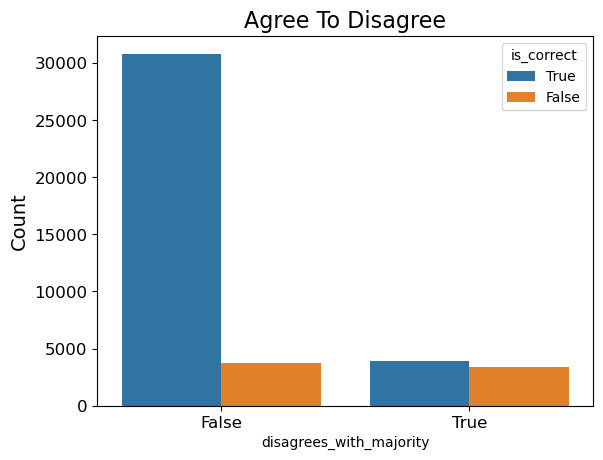

In [36]:
ax = sns.countplot(data=cartography_df, x="disagrees_with_majority", hue=cartography_df["is_correct"].astype(str))

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

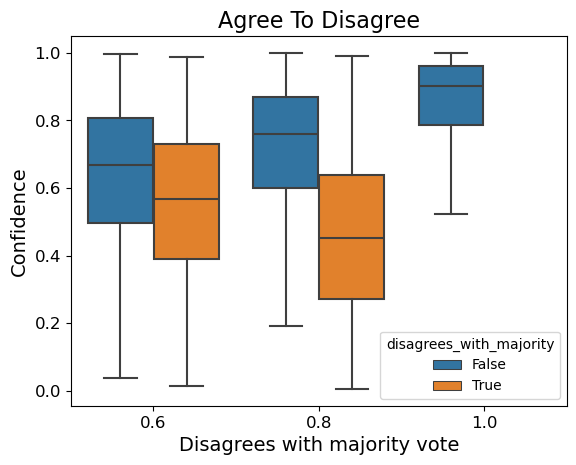

In [37]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", hue="disagrees_with_majority", showfliers=False)

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Disagrees with majority vote', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

### Task 4

In [38]:
num_unique_annotators = cartography_df['Aindex'].nunique()
print(num_unique_annotators)

819


In [39]:
f1_weighted = cartography_df.groupby('Aindex').apply(lambda x: f1_score(x['label'], x['pred']))
f1_macro = cartography_df.groupby('Aindex').apply(lambda x: f1_score(x['label'], x['pred'], average='macro'))
group_counts = cartography_df['Aindex'].value_counts()
annotator_metrics_df = pd.DataFrame({'f1_weighted': f1_weighted, 'f1_macro': f1_macro, 'group_count': group_counts})
annotator_metrics_df.head()

/Users/abhishekanand/miniforge3/envs/py11-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/abhishekanand/miniforge3/envs/py11-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/abhishekanand/miniforge3/envs/py11-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "

,f1_weighted,f1_macro,group_count
0,0.888889,0.867521,31
1,0.732919,0.731240,320
2,0.739623,0.813161,874
3,0.803738,0.857936,173
4,0.826667,0.835020,79


In [40]:
annotator_metrics_df

,f1_weighted,f1_macro,group_count
0,0.888889,0.867521,31
1,0.732919,0.731240,320
2,0.739623,0.813161,874
3,0.803738,0.857936,173
4,0.826667,0.835020,79
...,...,...,...
814,1.000000,1.000000,3
815,1.000000,1.000000,6
816,0.000000,1.000000,7
817,1.000000,1.000000,4


<Axes: xlabel='group_count', ylabel='f1_macro'>

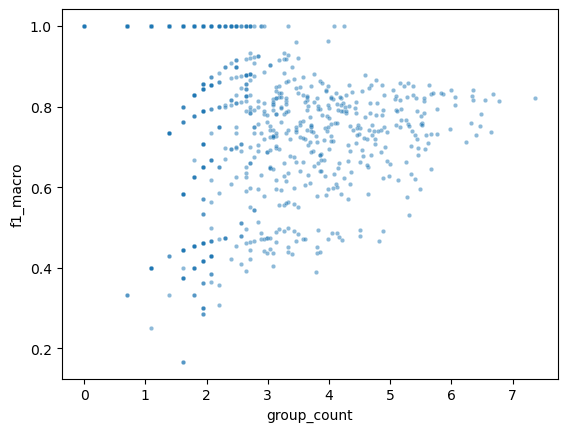

In [47]:
sns.scatterplot(x=np.log(annotator_metrics_df['group_count']), y=annotator_metrics_df['f1_macro'], alpha=0.5, s=10)

In [121]:
annotator_metrics_df.sort_values(['group_count'], ascending=False)

,f1_weighted,f1_macro,group_count
7,0.850625,0.821225,1581
2,0.739623,0.813161,874
36,0.828829,0.832010,792
69,0.566038,0.737921,770
64,0.808955,0.816806,700
...,...,...,...
625,0.000000,1.000000,1
669,1.000000,1.000000,1
639,0.000000,1.000000,1
655,0.000000,1.000000,1


In [123]:
len(annotator_metrics_df[annotator_metrics_df['group_count'] < 50])

632

In [124]:
annotator_metrics_df['group_count'].sum()

41785

In [118]:
annotator_metrics_df[annotator_metrics_df['group_count'] > 50]['group_count'].sum()

32769

## Repeating the tasks for data with annotators having more than 50 annotations.

In [127]:
annotator_indices = annotator_metrics_df[annotator_metrics_df['group_count'] > 50]['group_count'].index.values
len(annotator_indices)

185

In [128]:
annotator_indices

array([  1,   2,   3,   4,   6,   7,   8,  10,  13,  14,  16,  18,  21,
        22,  24,  25,  26,  27,  28,  29,  30,  31,  34,  36,  37,  38,
        39,  41,  42,  45,  46,  47,  50,  52,  53,  54,  55,  56,  58,
        59,  60,  62,  63,  64,  65,  66,  68,  69,  71,  73,  75,  76,
        79,  80,  82,  83,  84,  85,  86,  87,  88,  89,  91,  94,  95,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 111,
       112, 113, 115, 117, 118, 119, 121, 122, 124, 125, 130, 131, 134,
       136, 142, 143, 146, 148, 152, 153, 154, 155, 156, 160, 161, 162,
       166, 168, 169, 171, 173, 176, 177, 178, 180, 184, 190, 194, 195,
       201, 209, 210, 212, 213, 215, 216, 217, 219, 220, 221, 222, 223,
       228, 231, 245, 256, 257, 268, 270, 279, 286, 287, 295, 300, 303,
       304, 318, 324, 329, 352, 357, 370, 375, 376, 378, 425, 469, 472,
       486, 487, 496, 518, 538, 541, 580, 619, 629, 667, 672, 673, 674,
       675, 676, 678, 681, 683, 686, 690, 691, 705, 708, 711, 71

In [129]:
cartography_df_greater_than_50_anots = cartography_df[cartography_df['Aindex'].isin(annotator_indices)]
cartography_df_greater_than_50_anots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32769 entries, 31 to 41334
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   32769 non-null  int64  
 1   Mindex                   32769 non-null  int64  
 2   text                     32769 non-null  object 
 3   label_0_mean             32769 non-null  float64
 4   label_0_std              32769 non-null  float64
 5   label_0_last             32769 non-null  float64
 6   label_1_mean             32769 non-null  float64
 7   label_1_std              32769 non-null  float64
 8   label_1_last             32769 non-null  float64
 9   label                    32769 non-null  int64  
 10  pred                     32769 non-null  int64  
 11  agreement_level          32769 non-null  object 
 12  annotator_id             32769 non-null  object 
 13  comment_id               32769 non-null  object 
 14  majority_label       

### Task 1

In [132]:
cartography_df_low_conf_in_majority = cartography_df_greater_than_50_anots[cartography_df_greater_than_50_anots['comment_id'].isin(low_confidence_comment_ids)]
cartography_df_low_conf_in_majority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 52 to 41327
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   1946 non-null   int64  
 1   Mindex                   1946 non-null   int64  
 2   text                     1946 non-null   object 
 3   label_0_mean             1946 non-null   float64
 4   label_0_std              1946 non-null   float64
 5   label_0_last             1946 non-null   float64
 6   label_1_mean             1946 non-null   float64
 7   label_1_std              1946 non-null   float64
 8   label_1_last             1946 non-null   float64
 9   label                    1946 non-null   int64  
 10  pred                     1946 non-null   int64  
 11  agreement_level          1946 non-null   object 
 12  annotator_id             1946 non-null   object 
 13  comment_id               1946 non-null   object 
 14  majority_label        

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

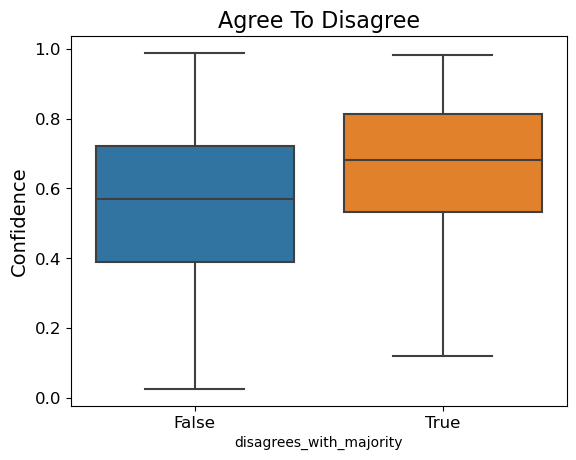

In [133]:
ax = sns.boxplot(data=cartography_df_low_conf_in_majority, x="disagrees_with_majority", y="confidence", showfliers=False)

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [134]:
cartography_df_high_conf_in_majority = cartography_df_greater_than_50_anots[cartography_df_greater_than_50_anots['comment_id'].isin(high_confidence_comment_ids)]
cartography_df_high_conf_in_majority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30823 entries, 31 to 41334
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   30823 non-null  int64  
 1   Mindex                   30823 non-null  int64  
 2   text                     30823 non-null  object 
 3   label_0_mean             30823 non-null  float64
 4   label_0_std              30823 non-null  float64
 5   label_0_last             30823 non-null  float64
 6   label_1_mean             30823 non-null  float64
 7   label_1_std              30823 non-null  float64
 8   label_1_last             30823 non-null  float64
 9   label                    30823 non-null  int64  
 10  pred                     30823 non-null  int64  
 11  agreement_level          30823 non-null  object 
 12  annotator_id             30823 non-null  object 
 13  comment_id               30823 non-null  object 
 14  majority_label       

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

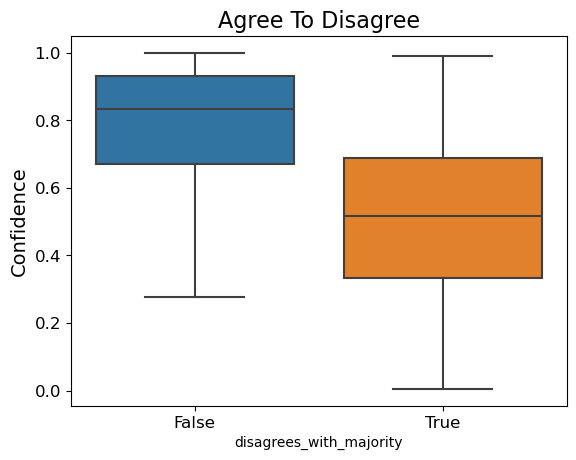

In [135]:
ax = sns.boxplot(data=cartography_df_high_conf_in_majority, x="disagrees_with_majority", y="confidence", showfliers=False)

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [50]:
cartography_df_low_conf_in_majority[cartography_df_low_conf_in_majority['confidence']>0.8][['text', 'label']].values[:10]

array([['<user> Begging for more money?  WTF? <url>', 0],
       ['<user> <user> <user> <user> Appearing to claim America’s cities have been besieged by "right-wing extremists’ instead of Antifa and BLM?  Defending CRT?   Repeating the Charlottesville lie?  Refusing to ask Biden if he disavowed Antifa?  Wallace phrased EVERY question to attack Trump and protect Biden.',
        0],
       ["If you don't agree with #BlackLivesMatter why don't you just keep quiet about it altogether. You don't HAVE to reveal yourself as Racist. Just don't expect US to keep quiet if you do.",
        0],
       ['<user> #BidenCrimeFamilyExposed #BidenCorruption #BidenIsANationalSecurityThreat #BidenIsARacist #BidenIsATraitor #BidenIsShot #BidenIsALoser #DeepStateExposed #AmericaVsSocialism #BidenFamilyCorruption Why NO ONE Should Vote For Joe Biden <url> via <user>',
        0],
       ['#TonyBobulinski  #MAGA2020 #MAGA #ChangeYourVoteToTrump #BidenCrimeFamily #BidenHarris2020 #BidenCares #LaptopFromHell 

In [51]:
cartography_df_low_conf_in_majority[cartography_df_low_conf_in_majority['confidence']<0.3][['text', 'label']].values[:10]

array([['If we only had the foresight to have a plan in place....oh wait we did.   The plan had Obamas name on it so we shit-canned it.   Trump is terribly unfit for office.',
        0],
       ['<user> <user> Cry more', 1],
       ['<user> Your future is behind bars', 1],
       ['<user> All you did a blaming. You were asked about COVID &amp; instead of giving solutions you started blaming president! Your party lost last time &amp; history will repeat it self on Nov 3rd.',
        1],
       ['<user> <user> Cry more', 1],
       ['<user> <user> <user> <user> He denied this many times. Anonymous sources are terrible. Biden called our troops stupid bastards and he denied it but it is on tape!',
        1],
       ['Book burning coming next... Communists!!', 1],
       ['<user> IM LEAVING AMERICA! SCREW THIS COUNTRY! I’m moving to Mexico where they actually run a civilised and balanced nation for its people.',
        0],
       ['Black people "trump and republicans are racist, VOTE BID

In [52]:
cartography_df_high_conf_in_majority[cartography_df_high_conf_in_majority['confidence'] < 0.3][['text', 'label']].values[:10]

array([['<user> <user> <user> <user> When will y’all stop blaming democrats for all your problems 😭😭',
        0],
       ['penis fingers...', 0],
       ["<user> Vote for Biden <user>  Again whom is writing this, the moron 🤡 can't figure it out.  its 🤡 shadow is a trail of death. 236.072 ☠️🦠  <user> 🤡 <user> 👹 <user> <user> = #nepotism #inbreeding #racism #facism #morons #inepitude #kakistocracy #Dystopia",
        0],
       ["Brazil? Shitstorm. There isn't a way to stem the spread of Covid19. Why? Because the President refuses to admit the virus is a community spreading, life threatening, pandemic that is fast becoming out of control under his authoritarian rulership. <url>",
        0],
       ['Oh <user> god help you.', 1],
       ['Hello everyone! It’s so good to  to feel alive again! I’ve been absent because I was diagnosed w/Covid19. It knocked me on my ass for the last 3 weeks! Today is the 1st time I’ve been well enough to even pick up my phone. Thank you all for your kind wo

## Joining and saving data

In [58]:
cartography_df_merged = cartography_df.merge(cartography_majority[['comment_id', 'confidence', 'variability']], on='comment_id')
cartography_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41785 entries, 0 to 41784
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   41785 non-null  int64  
 1   Mindex                   41785 non-null  int64  
 2   text                     41785 non-null  object 
 3   label_0_mean             41785 non-null  float64
 4   label_0_std              41785 non-null  float64
 5   label_0_last             41785 non-null  float64
 6   label_1_mean             41785 non-null  float64
 7   label_1_std              41785 non-null  float64
 8   label_1_last             41785 non-null  float64
 9   label                    41785 non-null  int64  
 10  pred                     41785 non-null  int64  
 11  agreement_level          41785 non-null  object 
 12  annotator_id             41785 non-null  object 
 13  comment_id               41785 non-null  object 
 14  majority_label        

In [59]:
cartography_df_merged.rename(columns={'confidence_x': 'confidence', 'variability_x': 'variability', 'confidence_y': 'majority_confidence', 'variability_y': 'majority_variability'}, inplace=True)
cartography_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41785 entries, 0 to 41784
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   41785 non-null  int64  
 1   Mindex                   41785 non-null  int64  
 2   text                     41785 non-null  object 
 3   label_0_mean             41785 non-null  float64
 4   label_0_std              41785 non-null  float64
 5   label_0_last             41785 non-null  float64
 6   label_1_mean             41785 non-null  float64
 7   label_1_std              41785 non-null  float64
 8   label_1_last             41785 non-null  float64
 9   label                    41785 non-null  int64  
 10  pred                     41785 non-null  int64  
 11  agreement_level          41785 non-null  object 
 12  annotator_id             41785 non-null  object 
 13  comment_id               41785 non-null  object 
 14  majority_label        

In [60]:
cartography_df_merged.to_csv('./results/full_cartography.csv', index=False)

In [61]:
both_votes_df = cartography_df_merged[cartography_df_merged['agreement_factor'] < 1.0].copy()
both_votes_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,...,majority_label,confidence,variability,correctness,is_correct,agreement_factor,agreement_factor_rd,disagrees_with_majority,majority_confidence,majority_variability
10,0,679,<user> <user> <user> President Trump spent his...,0.296290,0.195163,0.276914,0.703710,0.195163,0.723086,1,...,1,0.703710,0.195163,0.723086,True,0.6,0.6,False,0.805419,0.236047
11,2,679,<user> <user> <user> President Trump spent his...,0.661447,0.112500,0.637540,0.338553,0.112500,0.362460,0,...,1,0.661447,0.112500,0.637540,True,0.6,0.6,True,0.805419,0.236047
12,7,679,<user> <user> <user> President Trump spent his...,0.252828,0.141591,0.111033,0.747172,0.141591,0.888967,1,...,1,0.747172,0.141591,0.888967,True,0.6,0.6,False,0.805419,0.236047
13,22,679,<user> <user> <user> President Trump spent his...,0.637383,0.143021,0.733126,0.362617,0.143021,0.266874,1,...,1,0.362617,0.143021,0.266874,False,0.6,0.6,False,0.805419,0.236047
14,148,679,<user> <user> <user> President Trump spent his...,0.693151,0.083711,0.652475,0.306849,0.083711,0.347525,0,...,1,0.693151,0.083711,0.652475,True,0.6,0.6,True,0.805419,0.236047


In [62]:
both_votes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24285 entries, 10 to 41774
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   24285 non-null  int64  
 1   Mindex                   24285 non-null  int64  
 2   text                     24285 non-null  object 
 3   label_0_mean             24285 non-null  float64
 4   label_0_std              24285 non-null  float64
 5   label_0_last             24285 non-null  float64
 6   label_1_mean             24285 non-null  float64
 7   label_1_std              24285 non-null  float64
 8   label_1_last             24285 non-null  float64
 9   label                    24285 non-null  int64  
 10  pred                     24285 non-null  int64  
 11  agreement_level          24285 non-null  object 
 12  annotator_id             24285 non-null  object 
 13  comment_id               24285 non-null  object 
 14  majority_label       

In [1]:
both_votes_df.head()

NameError: name 'both_votes_df' is not defined